# Zero point motion
## Supplemental material for _The  <sup>8</sup>Li<sup>+</sup> site in α-Al<sub>2</sub>O<sub>3</sub>_


W.A. MacFarlane,<sup>1,2,3</sup> J.K. Shenton,<sup>4,*</sup> Z. Salman,<sup>5</sup> A. Chatzichristos,<sup>2,6,7</sup> D.L. Cortie,<sup>8</sup> M. Dehn,<sup>2,6</sup> D. Fujimoto,<sup>2,3,6</sup> V.L. Karner,<sup>1,3,5</sup> R.F. Kiefl,<sup>2,3,6</sup> D. Koumoulis,<sup>9</sup> C.D.P. Levy,<sup>3</sup> R.M.L. McFadden,<sup>1,2,3</sup> I. McKenzie,<sup>3,10,11</sup> G.D. Morris,<sup>3</sup> M.R. Pearson,<sup>3</sup> M. Stachura,<sup>3</sup> J.O. Ticknor<sup>1,2</sup> 

<sup><sub>
<sup>1 </sup>Chemistry Department, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada
<sup>2</sup>Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada
<sup>3</sup><span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC, V6T 2A3 Canada
<sup>4</sup>Scientific Computing Department, Science & Technology Facilities Council, Rutherford Appleton Laboratory, Didcot OX11 0QX, United Kingdom
<sup>5 </sup>Laboratory for Muon Spin Spectroscopy, Paul Scherrer Institute, CH-5232 Villigen PSI, Switzerland
<sup>6</sup>Department of Physics and Astronomy, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada
<sup>7</sup>Physics Department, Khalifa University, United Arab Emirates
<sup>8</sup>Australian Nuclear Science and Technology Organisation, Lucas Heights, New South Wales 2234, Australia
<sup>9</sup>Center for Applied Energy Research, University of Kentucky, Lexington, KY 40511, USA
<sup>10</sup>Department of Chemistry, Simon Fraser University, Burnaby, BC, V5A 1S6, Canada
<sup>11</sup>Department of Physics and Astronomy, University of Waterloo, Waterloo, Ontario, N2L 3G1, Canada
</sup></sub>

<sup>*</sup>For queries about the supplemental material in this repository contact [J. Kane Shenton](mailto:kane.shenton@stfc.ac.uk).

---




In this notebook we explore the energy landscape around the $^8\mathrm{Li^+}$ site in α-Al<sub>2</sub>O<sub>3</sub> octahedral interstitial site. These calculations are not as refined as those used in the final paper for the equilibrium site, but rather afford us the possibility of many single-point calculations. For the full calculation parameters, see the .castep files provided in the  `./zero_point_motion` directory. Note that these calculations only provide a rough idea of the effect of the zero point motion on the electric field gradient tensor at the Li site. 


The resulting energy and $\nu_Q$ landscape appears to be nicely parabolic for a large range of displacements:

<img src="./zero_point_motion/ZPM.png" width="80%">

(A vector version of this figure is available at `./zero_point_motion/ZPM` and the data used to plot it is at `./zero_point_motion/ZPM_exploration.csv`.)





Import required modules

In [25]:
from ase.io import read
import pandas as pd
import numpy as np
from soprano.properties.nmr import EFGVzz
from soprano.data.nmr import EFG_TO_CHI

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.style.use('./style_figs.mplstyle')

Useful functions:

In [91]:
def get_nu_Q(atoms,
            Li_idx=0,     # Li index 
            Li8_Q = 32.6, # mbarn for 8Li
            Li8_I = 2.0,  # nuclear spin
            ):

    Vzz = EFGVzz().get(atoms)[Li_idx]
    nu_Q = Vzz*EFG_TO_CHI *Li8_Q / (2*Li8_I)
    nu_Q *= 1e-3 # convert to kHz
    return nu_Q

def plotZPM(df, figtitle=None):

    xmin = -0.5 # Å
    xmax =  0.5 # Å

    cm = 0.393701 # one cm in inches
    fig, (axE, axA) = plt.subplots(2,3, sharex=True,  sharey='row', figsize=(10,6))
#     xmin, xmax = -1, 1

    for i in range(3):
        # labels
        axE[i].set_xlabel(f"Cartesian direction {i+1}")
        axE[i].xaxis.set_label_position('top') 

        # raw data
        df_temp = df[df['directions'] == i]
        d = df_temp['displacements/A']
        E = df_temp['energies/eV']
        A = df_temp['nuQ/kHz']

        # fit parabola to energy
        # ignore extreme points when fitting
        st = 2; end = -2
        a,b,c = np.polyfit(d[st:end], E[st:end], deg=2)
        x = np.linspace(-0.5, 0.5, 101)
        y = a*x**2 + b * x + c
        fitlabel = f"{a:4.2f}$x^2$ + {b:4.2f}$x$ + {c:4.2f}"
        axE[i].plot(x, y, label=fitlabel)


        # fit parabola to nuQ
        # ignore extreme points when fitting
        st = 2; end = -2
        a,b,c = np.polyfit(d[st:end], A[st:end], deg=2)
        print(f"{a:14.9f}x^2 + {b:14.9f}x + {c:14.9f}")
        x = np.linspace(-0.5, 0.5, 101)
        y = a*x**2 + b * x + c
        fitlabel = f"{a:4.2f}$x^2$ + {b:4.2f}$x$ + {c:4.2f}"
        axA[i].plot(x, y, label=fitlabel)
        
        # plot data
        axE[i].plot(d, E, 'o', markersize=4, label='data')
        axA[i].plot(d, A, 'o', markersize=4, label='data')

        # --- extra bits --- #
        # vline
        axE[i].axvline(0, ls='--', c='0.75',lw=0.5)
        axA[i].axvline(0, ls='--', c='0.75',lw=0.5)

        axE[i].legend()
        axA[i].legend()

    axE[0].set_ylabel("Energy (eV)")
    axA[0].set_ylabel(r"$\nu_{Q}$ (kHz)")

    for ax in axE:
        ax.set_ylim([-0.1,1.3])

    fig.text(0.5, 0.01, 'Displacement from equilibrium (Å)', ha='center')

    if figtitle != None:
        fig.suptitle(figtitle)

Read in the data (note that we also provide the extracted information in a .CSV file for convenience.)

In [21]:
kpts = [1,1,1]
cutoff = 900
xc = "PBESOL"
site_label = 0
charge = 1
sc = [3,3,3]
Li_idx= 0


# Extract equilibrium results
label = f"al2o3_sc-{sc[0]}x{sc[1]}x{sc[2]}_site-{site_label}_dir-{0}_disp_{0:7.5f}"
castepout = f"zero_point_motion/{label}.castep"
magres = read(f"zero_point_motion/{label}.magres")
atoms_eq = read(castepout)
# energy
e_eq = atoms_eq.get_potential_energy()
# nuQ
nuQ_eq = get_nu_Q(magres)


# create array of displamcent magnitudes
Li_pos_eq = atoms_eq.positions[Li_idx]
v1, v2, v3 = np.eye(3)
displacements = np.logspace(-4, -1, base=2, num=5)
displacements = np.hstack([np.flip(-displacements), [0], displacements])
Li_positions_v1 = [v1*d + Li_pos_eq for d in displacements]
Li_positions_v2 = [v2*d + Li_pos_eq for d in displacements]
Li_positions_v3 = [v3*d + Li_pos_eq for d in displacements]


# loop over all and extract data to a pandas dataframe:
df = pd.DataFrame()
all_directions = []
all_displacements = []
all_energies = []
all_nuQs = []
for direction, v in enumerate([v1, v2, v3]):
    
    print("directon: ", direction)
    
    for disp in displacements:
        label = f"al2o3_sc-{sc[0]}x{sc[1]}x{sc[2]}_site-{site_label}_dir-{direction}_disp_{disp:7.5f}"
        castepout = f"./zero_point_motion/{label}.castep"
        magres = read(f"./zero_point_motion/{label}.magres")
        atoms = read(castepout)
        # energy
        e = atoms.get_potential_energy()
        # --- Cq --- #
        nuQ = get_nu_Q(magres)

        
        
        
        all_directions.append(str(direction))
        all_displacements.append(disp)
        all_energies.append(e - e_eq)
        all_nuQs.append(nuQ)

df['directions']       = all_directions
df['displacements/A']  = all_displacements
df['energies/eV']      = all_energies
df['nuQ/kHz']          = all_nuQs

# save to CSV file for later:
df.to_csv('./zero_point_motion/ZPM_exploration.csv')

directon:  0
directon:  1
directon:  2


In [22]:
# If you don't want to/can't re-run the above cell, you can just read in the data from the CSV file:
df = pd.read_csv('./zero_point_motion/ZPM_exploration.csv')
df

,Unnamed: 0,directions,displacements/A,energies/eV,nuQ/kHz
0,0,0,-0.500000,7.890268e-01,43.134096
1,1,0,-0.297302,2.452270e-01,53.282469
2,2,0,-0.176777,8.233307e-02,63.874000
3,3,0,-0.105112,2.859419e-02,68.306667
4,4,0,-0.062500,9.967760e-03,69.951702
5,5,0,0.000000,0.000000e+00,70.864106
6,6,0,0.062500,9.939980e-03,69.951881
7,7,0,0.105112,2.854702e-02,68.307558
8,8,0,0.176777,8.225064e-02,63.873946
9,9,0,0.297302,2.450749e-01,53.282123


### Plots

We can now plot the energy and calculated $\nu_Q$ for Li and total system energy as a function of the displacements along the Cartesian axes. 

Note that the x and y axes should be equivalent given our unit cell definition. Cartesian z lies along the rhombohedral [111] axis. 

-222.607510417x^2 +    0.001031133x +   70.814418217
-222.818250655x^2 +    0.000467240x +   70.816510510
 611.234572200x^2 +   -0.006654275x +   70.833622949


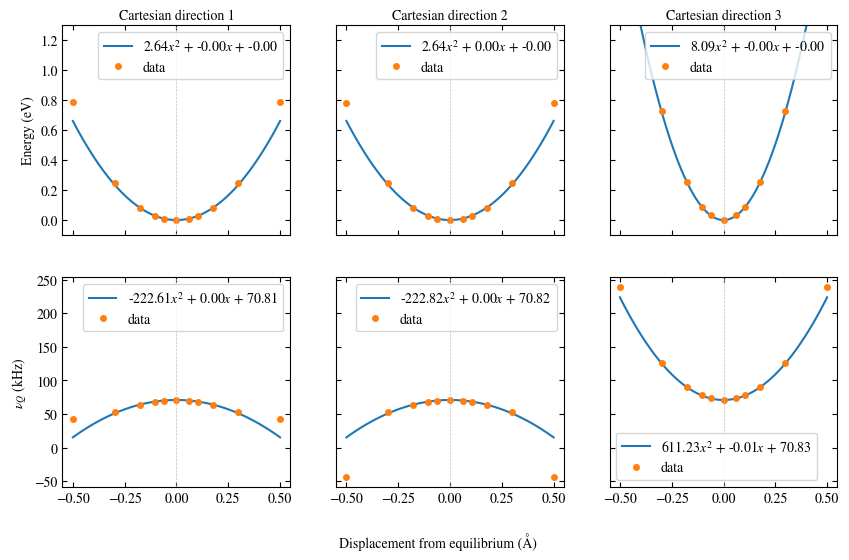

In [92]:
plotZPM(df)
plt.savefig('./zero_point_motion/ZPM.png', dpi=400)
plt.savefig('./zero_point_motion/ZPM.pdf')